In [2]:
from collections import Counter
from math import sqrt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt

In [3]:
def flip_coin(num, eps):
    uni = sps.uniform(0.5, 1)
    sample = uni.rvs(num)
    sample = np.floor(sample)
    counts = Counter(sample)
    rel_freq = counts[1] / num
    print("Для {:d} гербов".format(num))
    print("Количество выпадения гербов: {:d}".format(counts[1]))
    print("Относительная частота выпадения герба: {:f}".format(rel_freq))
    print("|{:f} - 0.5| = {:f} < {:.2f}".format(rel_freq, abs(rel_freq - 0.5), eps))

In [4]:
flip_coin(170, 0.1)
print()
flip_coin(1850, 0.03)

Для 170 гербов
Количество выпадения гербов: 79
Относительная частота выпадения герба: 0.464706
|0.464706 - 0.5| = 0.035294 < 0.10

Для 1850 гербов
Количество выпадения гербов: 923
Относительная частота выпадения герба: 0.498919
|0.498919 - 0.5| = 0.001081 < 0.03


In [5]:
def law_large_numbers(eps):
    expon = sps.expon(0, 1)
    n = int(np.ceil(5.4*1 / (eps*eps)))
    sample = expon.rvs(n)
    m = np.mean(sample)
    print("Для {:d} вариантов:".format(n))
    print("|{:f} - 1| = {:f} < {:.2f}".format(m, abs(m - 1), eps))
    

In [6]:
law_large_numbers(0.2)
print()
law_large_numbers(0.05)

Для 135 вариантов:
|0.925586 - 1| = 0.074414 < 0.20

Для 2160 вариантов:
|0.971042 - 1| = 0.028958 < 0.05


In [7]:
def not_law_large_numbers():    
    cauchy = sps.cauchy()
    sample_size = 1000
    num = 7
    samples = []
    means = np.array([])
    for i in range(num):
        samples.append(cauchy.rvs(sample_size))
        means = np.append(means, np.mean(samples[i]))
    print("Модули средних значений 7 выборок по 1000 элементов:")
    print(abs(means))
    print("Модуль общего среднего из 7 выборок по 1000 элементов: {:f}".format(np.mean(abs(means))))
    
    num = 1000
    sample = cauchy.rvs(num)
    X = np.linspace(0, num, num)
    plt.plot(X, sample)
    plt.xlabel("Номер испытания")
    plt.ylabel("Значение случайной величины")

Модули средних значений 7 выборок по 1000 элементов:
[1.18842596 5.75453876 0.72836539 3.1317461  1.24524655 1.36698457
 1.76609171]
Модуль общего среднего из 7 выборок по 1000 элементов: 2.168771


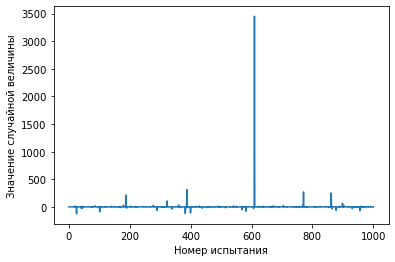

In [8]:
not_law_large_numbers()

In [9]:
def deviation(sample_size):
    uni = sps.uniform(0, 1)
    num = 20
    samples = []
    means = np.zeros(num)
    for i in range(num):
        samples.append(uni.rvs(sample_size))
        means[i] = np.mean(samples[i])
    print("Средние значения из {:d} выборок по {:d}:".format(num, sample_size))
    print(means)
    std_dev = sps.tstd(means)
    print("Среднеквадратичное отклонение от выборочного среднего: {:f}".format(std_dev))
    print("Минимальное среднее: {:f}".format(min(means)))
    print("Максимальное среднее: {:f}".format(max(means)))
    print()
    Y = np.full((num),  sample_size)
    plt.plot(means, Y, 'o')

Средние значения из 20 выборок по 10:
[0.53509522 0.57824719 0.46752709 0.45845442 0.54987796 0.53815941
 0.55129111 0.58197201 0.5488245  0.46703333 0.40186506 0.43640069
 0.56289996 0.52782756 0.60235555 0.65201338 0.47804701 0.38073653
 0.54778038 0.34643418]
Среднеквадратичное отклонение от выборочного среднего: 0.078538
Минимальное среднее: 0.346434
Максимальное среднее: 0.652013

Средние значения из 20 выборок по 40:
[0.50546242 0.45238467 0.50979917 0.58491669 0.52847084 0.4935061
 0.40613009 0.47632436 0.55737312 0.3773363  0.5451078  0.50131716
 0.47217089 0.53418382 0.54169726 0.50623337 0.52070386 0.56802554
 0.50965235 0.47857377]
Среднеквадратичное отклонение от выборочного среднего: 0.050934
Минимальное среднее: 0.377336
Максимальное среднее: 0.584917

Средние значения из 20 выборок по 160:
[0.54114212 0.48590514 0.48479968 0.50755844 0.45868925 0.50225354
 0.51410487 0.47484922 0.46886857 0.50065158 0.4761082  0.49339026
 0.5002627  0.50797876 0.47928136 0.48009611 0.538

Text(0, 0.5, 'Количество элементов в выборке')

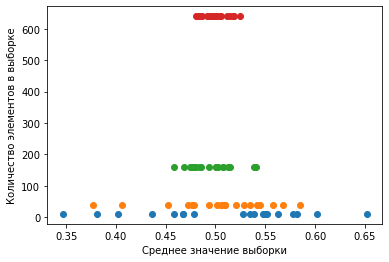

In [10]:
deviation(10)
deviation(40)
deviation(160)
deviation(640)
plt.xlabel("Среднее значение выборки")
plt.ylabel("Количество элементов в выборке")


In [11]:
def borel():
    sample_size = 500
    vars = [0, 1]
    sample = np.random.choice(vars, sample_size)
    freq = np.zeros((sample_size))
    freq[0] = sample[0]
    for i in range(1, sample_size):
        freq[i] = (i * freq[i-1] + sample[i]) / float(i+1)
    X = np.linspace(0, sample_size, sample_size)
    plt.plot(X, freq)

Text(0, 0.5, 'Средняя вероятность выпадения герба')

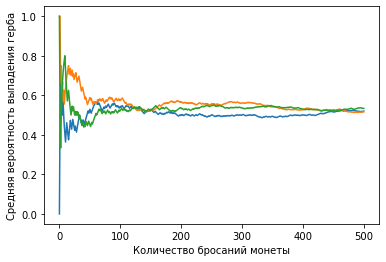

In [12]:
borel()
borel()
borel()
plt.xlabel("Количество бросаний монеты")
plt.ylabel("Средняя вероятность выпадения герба")

In [13]:
def not_borel(param):
    sample_size = 500
    vars = [-1, 1]
    signs = np.random.choice(vars, sample_size)
    uni = sps.uniform(0, 1)
    uniformed = uni.rvs(sample_size)
    sample = []
    for i in range(sample_size):
        sample.append((uniformed[i] ** (-param) - 1) * signs[i])
    
    freq = np.zeros((sample_size))
    freq[0] = sample[0]
    for i in range(1, sample_size):
        freq[i] = (i * freq[i-1] + sample[i]) / float(i+1)
    X = np.linspace(0, sample_size, sample_size)
    plt.plot(X, freq)

def not_borel_3_times(param):
    for i in range(3):
        not_borel(param)
    plt.xlabel("Количество испытаний")
    plt.ylabel("Среднее значение случайной величины")

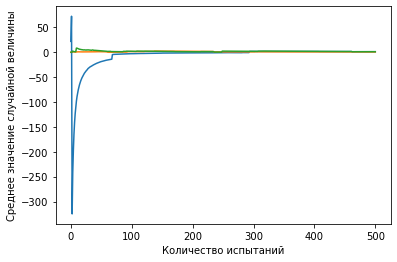

In [14]:
not_borel_3_times(1)

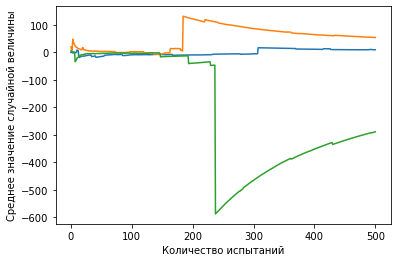

In [15]:
not_borel_3_times(1.5)

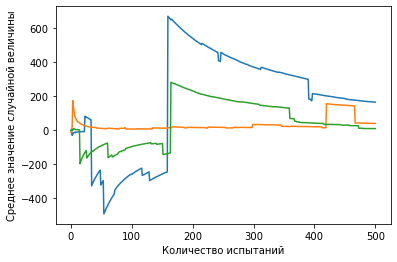

In [16]:
not_borel_3_times(2)

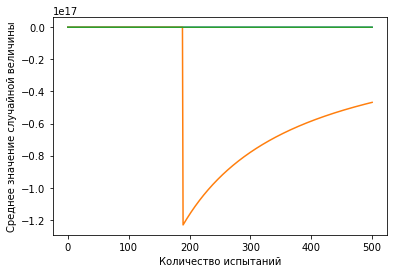

In [17]:
not_borel_3_times(5)

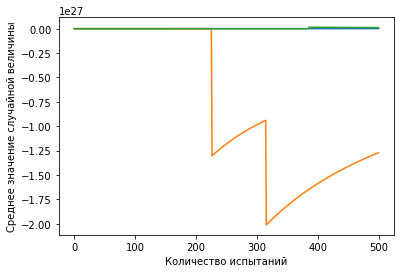

In [18]:
not_borel_3_times(10)

In [19]:
def glivenko(sample_size):
    uni = sps.uniform(0, 1)
    sample = uni.rvs(sample_size)
    sample = sorted(sample)
    cdf = [1.0 / sample_size]
    for i in range(1, sample_size):
        cdf.append(cdf[i-1] + 1.0 / sample_size)
    X = np.linspace(0, 1, 100)
    theor_cdf = uni.cdf(X)
    
    plt.step(sample, cdf)
    plt.plot(X, theor_cdf)
    plt.xlabel("x")
    plt.ylabel("F(x)")

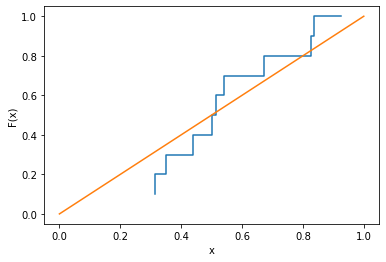

In [108]:
glivenko(10)

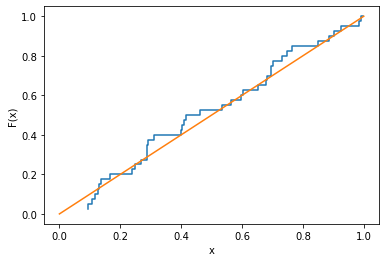

In [109]:
glivenko(40)

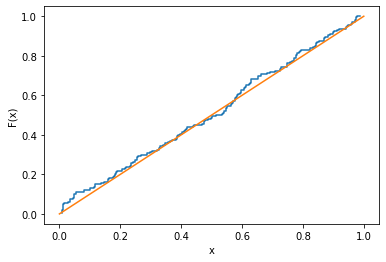

In [22]:
glivenko(160)

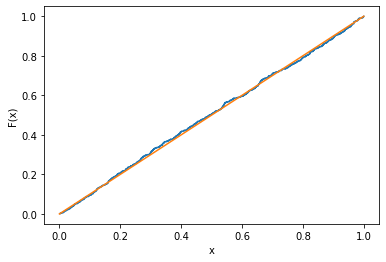

In [23]:
glivenko(640)

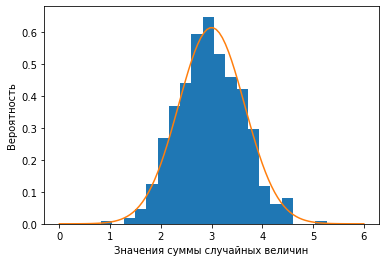

In [28]:

def clt(sample_size, create_random_variable, theor_pdf, interval):
    sample = []
    for i in range(sample_size):
        sample.append(create_random_variable())
    X = np.linspace(interval[0], interval[1], 100)
    Y = []
    for i in range(len(X)):
        Y.append(theor_pdf(X[i]))
    plt.hist(sample, bins=20, density=True)
    plt.plot(X, Y)
    plt.xlabel("Значения суммы случайных величин")
    plt.ylabel("Вероятность")


def create_mixed_variable():
    value = sps.beta.rvs(1, 0.5, size=1)[0]
    value += sps.beta.rvs(0.5, 1, size=1)[0]
    value += sps.beta.rvs(1, 1, size=1)[0]
    value += sps.beta.rvs(1, 2, size=1)[0]
    value += sps.beta.rvs(2, 1, size=1)[0]
    value += sps.beta.rvs(2, 2, size=1)[0]
    return value


def beta_expected_value(a, b):
    return a / (a + b)


def beta_dispersion(a, b):
    return a * b / ((a + b) * (a + b) * (a + b + 1))


expected_value = beta_expected_value(1, 0.5) + \
    beta_expected_value(0.5, 1) + beta_expected_value(1, 1) + \
    beta_expected_value(1, 2) + beta_expected_value(2, 1) + \
    beta_expected_value(2, 2)
dispersion = beta_dispersion(1, 0.5) + \
    beta_dispersion(0.5, 1) + beta_dispersion(1, 1) + \
    beta_dispersion(1, 2) + beta_dispersion(2, 1) + \
    beta_dispersion(2, 2)

def theor_pdf(x):
    return sps.norm.pdf(x, loc=expected_value, scale=sqrt(dispersion))

        
clt(500, create_mixed_variable, theor_pdf, (0, 6))

In [88]:
beta_d = sps.beta.rvs(0.5, 0.5, size=(500, 5))

In [89]:
s2 = beta_d[:, :2].sum(axis=1)
s4 = beta_d[:, :4].sum(axis=1)
s6 = beta_d.sum(axis=1)

In [92]:
def theor(x, a, b):
    return sps.norm.pdf(x, loc=beta_expected_value(a, b), scale=sqrt(beta_dispersion(a, b)))

# def draw(interval):
#     X = np.linspace(interval[0], interval[1], 100)
#     Y = []
#     for i in range(len(X)):
#         Y.append(theor(X[i], interval[0], interval[1]))
# #     plt.plot(X, Y)
#     plt.hist(beta_d[:, 0], bins=20)
#     plt.xlabel("Значения суммы случайных величин")
#     plt.ylabel("Вероятность")

Text(0.5, 0, 'Значения суммы случайных величин')

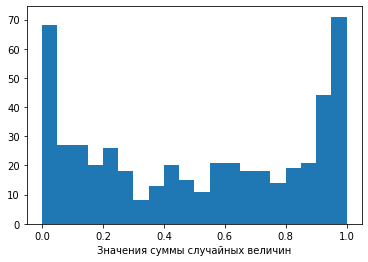

In [110]:
# X = np.linspace(0, 1, 100)
# Y = []
# for i in range(len(X)):
#     Y.append(sps.norm.pdf(X[i], loc=beta_expected_value(0.5, 0.5), scale=sqrt(beta_dispersion(0.5, 0.5))))

# plt.plot(X, Y)
plt.hist(beta_d[:, 0], bins=20)
plt.xlabel("Значения суммы случайных величин")
# plt.ylabel("Вероятность")

(array([12., 15., 20., 19., 20., 23., 24., 35., 39., 51., 42., 38., 27.,
        17., 26., 26., 12., 20., 14., 20.]),
 array([0.00517195, 0.10484662, 0.20452128, 0.30419594, 0.40387061,
        0.50354527, 0.60321993, 0.7028946 , 0.80256926, 0.90224392,
        1.00191859, 1.10159325, 1.20126791, 1.30094258, 1.40061724,
        1.5002919 , 1.59996657, 1.69964123, 1.79931589, 1.89899056,
        1.99866522]),
 <a list of 20 Patch objects>)

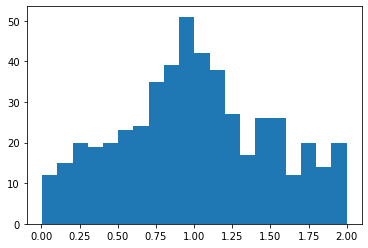

In [96]:
plt.hist(s2, bins=20)

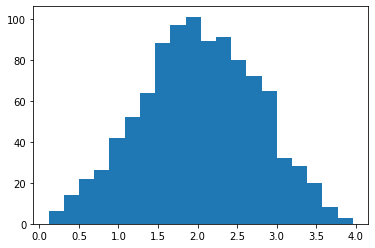

In [82]:
plt.hist(s4, bins=20)
plt.show()

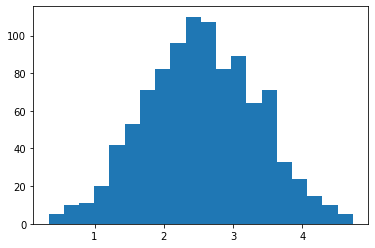

In [79]:
plt.hist(s6, bins=20)
plt.show()

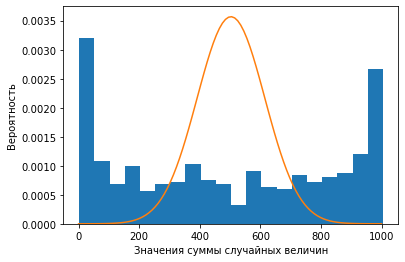

In [25]:
def create_bad_mixed_variable():
    return create_mixed_variable() + 1000 * sps.beta.rvs(0.5, 0.5, size=1)[0]


bad_expected_value = expected_value + 1000 * beta_expected_value(0.5, 0.5)
bad_dispersion = dispersion + 100000 * beta_dispersion(0.5, 0.5)

def bad_theor_pdf(x):
    return sps.norm.pdf(x, loc=bad_expected_value, scale=sqrt(bad_dispersion))


clt(500, create_bad_mixed_variable, bad_theor_pdf, (0, 1000))